<a href="https://colab.research.google.com/github/Jayashrita/Plot_scripts/blob/master/plot_3D_surfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Load libraries
import matplotlib.pyplot as plt
import numpy as np
#import plotly.plotly as py
import seaborn as sns
from google.colab import files

In [0]:
#@title Functions
def discrete_cmap(N, base_cmap=None):
    """Create an discrete colormap with a number of colors from the specified input map"""
  
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

def data_matrix(x,y,z):
    pts=len(x)
    binx = x[1]-x[0]
    nbinx = int(np.ceil((max(x)-min(x))/binx))
    nbiny = int(np.ceil(len(x)/nbinx))
    p=0
    
    nx=[]
    ny=[]
    nz=[[0 for pi in range(nbinx)] for pj in range(nbiny)]
#    print(pts,grid,len(z))
    for i in range(nbiny):
        for j in range(nbinx):
            if(i==0):nx.append(x[p])
            if(j==0): ny.append(y[p])
            nz[i][j]=(z[p])
            p+=1
           # print(i,j)
    #print(nz)
    return nx,ny,nz

def color_plot2D(N,x,y,z,cmap_name):
    #print((min(z)), (max(z)))
    #low=np.floor(min(z))
    low=min(z)
    high=max(z)
   # high=np.ceil(max(z))
    xn,yn,zn=data_matrix(x,y,z)
# range of each color, spacing between each division N
#adjusts the upperlimit accordingly  
    if((high-low)%N != 0): high=high+(N-(high-low)%N)  
    #maxcol=int(np.floor((high-low)/N))+1 
    maxcol=int(np.floor((high-low)/N))+1
    #print(maxcol)
    V=np.linspace(low,high,maxcol,endpoint=True)
    cmap=discrete_cmap(maxcol,cmap_name)
    plt.contourf(xn,yn,zn,V,cmap=cmap)
    plt.colorbar(ticks=V)


In [17]:
#@title Load File

upload_from = "Local" #@param ["Local", "GoogleDrive", "URL"]

if upload_from == "Local":
    print("================================")
    print("== Upload dataset ==")
    print("================================")
    uploaded = files.upload()
    for fn in uploaded.keys():
        !mv {fn} A.dat


elif upload_from == "GoogleDrive":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    
    gdrive_path_state = "gdrive/My Drive/" #@param {type:"string"}
    !cp "{gdrive_path_state}" A.dat


elif upload_from == "URL":
    url_state = "" #@param {type:"string"}
    !wget -O A.dat {url_state} 


== Upload dataset ==


Saving fes.b1.iter-10000.data to fes.b1.iter-10000.data


In [0]:
#@title **Plot parameters**
Delta_E =  5 #@param {type:"integer"}
Filename= 'fes_ala.png'#@param {type:"string"}
x_label= '$\phi$'#@param {type:"string"}
y_label= '$\psi$'#@param {type:"string"}

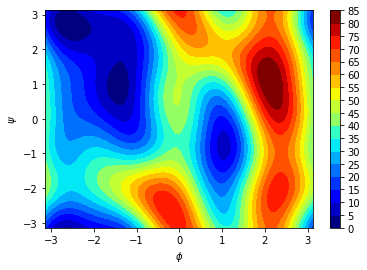

In [27]:

plt.figure(1)
x,y,z=np.loadtxt('A.dat',unpack=True)
a=color_plot2D(Delta_E,x,y,z,'jet')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(Filename, transparent=True, bbox_inches="tight")
files.download(Filename)

